In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [3]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.02,0,.02]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [4]:
def make_dataframe(mean,std,datapoints,plant,base_add,base_multi,length_multi):
    gauss_1 = get_gaussian_dist(mean,std,datapoints)
    gauss_2 = get_gaussian_dist(mean,std,datapoints)
    water_1 = get_waterfall(datapoints)
    dict = {'Base_gauss_1':gauss_1,'Sun_gauss_1':gauss_2,'Water_multi_1':water_1}
    df=pd.DataFrame(dict)
    df['var_1_w'] = (((df['Base_gauss_1'] * base_multi) + base_add) + df['Sun_gauss_1']) * (df['Water_multi_1'] + 1)
    df['var_1_l'] = df['var_1_w'] * (length_multi)
    #df['rand'] = (df['var_1_l']/df['var_1_w']) - length_multi
    df['plant_type'] = plant
    return(df)

In [5]:
plant_1 = make_dataframe(mean,std,datapoints,'plant_1',9.9,1,8.8)
plant_2 = make_dataframe(mean,std,datapoints,'plant_2',10.1,1,8.5)
plant_3 = make_dataframe(mean,std,datapoints,'plant_3',9.8,1.4,8.2)

In [6]:
fake_iris = pd.concat([plant_1,plant_2,plant_3])

In [7]:
fake_iris.sample(10)

,Base_gauss_1,Sun_gauss_1,Water_multi_1,var_1_w,var_1_l,plant_type
7586,0.576535,0.521440,0.00,11.197975,95.182786,plant_2
7478,0.557538,0.499746,0.02,11.301904,92.675614,plant_3
8675,0.521480,0.598510,0.00,11.128582,91.254375,plant_3
14596,0.586882,0.404794,-0.02,10.673843,93.929815,plant_1
4257,0.310603,0.493714,-0.02,10.513987,86.214691,plant_3
18066,0.455108,0.443788,0.00,10.880939,89.223696,plant_3
16226,0.486301,0.437842,0.00,10.918664,89.533045,plant_3
4768,0.503651,0.442107,-0.02,10.728274,87.971851,plant_3
17644,0.450444,0.515084,-0.02,10.844217,92.175844,plant_2
13617,0.450148,0.416803,0.00,10.766951,94.749170,plant_1


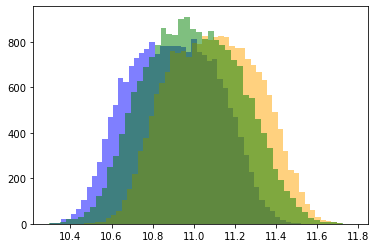

In [8]:
plt.hist(plant_1['var_1_w'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1_w'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1_w'], bins = 50, color='green',alpha=.5);

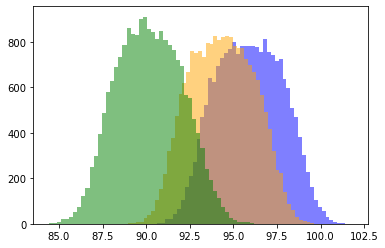

In [9]:
plt.hist(plant_1['var_1_l'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1_l'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1_l'], bins = 50, color='green',alpha=.5);

In [10]:
export_data = fake_iris[['var_1_l','var_1_w','plant_type']]

In [13]:
export_data.to_csv('data_folder/fake_iris_2.csv')